# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Syafiq Irzaky
- **Email:** syafiqirzaky@gmail.com
- **ID Dicoding:** mc006d5y2436

## Menentukan Pertanyaan Bisnis

1.  Bagaimana preferensi dan perilaku pengguna casual dan registered?
2.  Bagaimana tren penyewaan sepeda dalam kurun waktu 2011-2012?
3.  Bagaimana pola yang ditemukan terkait tren persentase
jumlah penyewaan oleh penyewa casual dan registered sepeda selama periode 2011-2012?
4. Seberapa besar pengaruh variabel cuaca (atemp, hum, windspeed) dan musim terhadap total penyewaan sepeda (cnt) per hari selama periode 2011-2012?

## Import Semua Packages/Library yang Digunakan

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada fase pengumpulan data, saya mengimpor dataset **Bike Sharing** yang terdiri dari file day.csv dan hr.csv untuk diproses lebih lanjut. Untuk memudahkan akses ke dataset, saya akan mengkoneksikan google colab ini dengan google drive Saya. Dataset sumber yang akan digunakan sudah ada di google drive dan dapat diakses langsung ke google colab.

In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Selanjutnya kita akan mengumpukan data yang akan kita gunakan dalam proyek ini. Sesuai dengan judul, kita akan melakukan analisis data dengan dataset **Bike Sharing**. Dalam dataset ini terdapat dua file, yaitu file hour dan day yang akan kita akan impor ke dalam pandas dataframe.

**Load File Day**

In [105]:
day_df = pd.read_csv("/content/drive/MyDrive/Bike-sharing-dataset/day.csv")
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


**Load File Hour**

In [106]:
hour_df = pd.read_csv("/content/drive/MyDrive/Bike-sharing-dataset/hour.csv")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Setelah mengimpor kedua data set, *day* dan *hour*, diketahui bahwa keduanya memiliki data yang identik. Perbedaan antara kedua dataset tersebut adalah pada dataset *hour* memiliki kolom hr (hour), sedangkan pada dataset tidak ada kolom tersebut.
- Sesuai dengan pertanyaan bisnis yang telah dibuat, kita memerlukan informasi jam yang ada pada kolom hour. Oleh karena itu, pada proyek ini kita hanya akan menggunakan dataset *hour* yang memiliki kolom hour.

In [107]:
del day_df
sales_df = hour_df
del hour_df

**Catatan**: Karena kita hanya menggunakan data sumber dari day.csv, maka day_df akan kita hapus. Selain itu, agar lebih mudah dikenali, kita akan mengganti nama sales_df menjadi sales_df. Perubahan nama ini dilakukan sebab nama 'hour' memiliki kemiripan dengan kolom 'hour'. Dikhawatirkan akan terjadi kerancuan terkait penamaan ini.

### Assessing Data

Setelah dataset *hour* dikumpulkan, selanjutnya adalah tahap penilaian data. Tahap ini bertujuan untuk melihat apakah ada anomali pada data serta menguji kelayakan data untuk diproses ke tahap selanjutnya.

Pertama tama, kita perlu melihat tipe data dari tiap kolom yang kita miliki.

In [108]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Sel di atas telah menunjukkan tipe data apa saja yang kita miliki di setiap kolom. Selanjutnya, kita akan mengecek apakah data yang kita miliki memiliki nilai kosong atau *null*.

In [109]:
sales_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Dari sel di atas, diketahui bahwa tidak ditemukan nilai kosong atau *null* dari tiap kolom. Oleh karena itu, kita tidak perlu melakukan imputasi data untuk mengisi data yang hilang. Selanjutnya, kita akan mengecek apakah data kita memiliki baris yang duplikat atau tidak.

In [110]:
print("Jumlah baris yang duplikat: ", sales_df.duplicated().sum())

Jumlah baris yang duplikat:  0


Dari sel di atas, diketahui bahwa tidak ditemukan baris yang duplikat. Selanjutnya, kita akan mengecek deskripsi statistik dari data yang kita miliki.

In [111]:
sales_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dapat diketahui bahwa dataset yang digunakan tidak memiliki baris yang duplikat dan tidak ada missing value.
- Dari nilai statistik yang dihasilkan juga tidak ditemukan anomali.
- Dengan demikian, dapat dinyatakan bahwa dataset yang digunakan layak untuk masuk ke tahap berikutnya.

### Cleaning Data

Setelah data dikumpulkan, langkah berikutnya adalah pembersihan data. Di tahap ini kita akan membuang data yang tidak digunakan dan menyesuaikan data agar lebih mudah untuk dianalisis.

**Membuang kolom instant dan temp**

Sesuai dengan pertanyaan yang telah dirumuskan, kolom instant tidak memiliki informasi yang berguna untuk dilakukan analisis. Selain itu, kolom temperatur yang menunjukkan suhu kurang relevan, mengingat terdapat kolom atemp yang menunjukkan suhu yang dirasakan. Dalam konteks penyewaan sepeda, suhu yang dirasakan (atemp) lebih relevan untuk dianalisis karena langsung berkaitan dengan kondisi yang dirasakan oleh penyewa


In [112]:
drop_col = ['instant', 'temp']

for i in sales_df.columns:
  if i in drop_col:
    sales_df.drop(labels=i, axis=1, inplace=True)
sales_df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

**Mengubah nama kolom menjadi lebih sesuai**

Untuk memudahkan proses analisis dan penamaan variabel, kita perlu memodifikasi nama beberapa kolom dari dataset agar lebih mudah dimengerti ketika dibaca.

In [113]:
sales_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weathersit': 'weathersituation',
    'hum': 'humidity',
    'cnt': 'count'
}, inplace=True)

**Mengubah nilai numerik dalam beberapa kolom menjadi label deskriptif**
beberapa kolom yang berisi data kategorikal masih disimpan dalam bentuk token (direpresentasikan oleh angka). Untuk kolom yang memiliki informasi lebih dari 2 kategori, untuk memudahkan proses analisis, akan kita ubah datanya sesuai informasi aslinya. Pemetaan token ke data asli dilakukan di bawah ini sesuai informasi asli yang dicantumkan pada metadata dataset.

In [114]:
# Mengubah token pada kolom season menjadi nama musim dalam setahun dalam bahasa inggris
sales_df['season'] = sales_df['season'].replace({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
# Mengubah token numerik kolom month menjadi nama bulan dalam setahun dalam bahasa inggris
sales_df['month'] = sales_df['month'].replace({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
# Mengubah token numerik kolom weekday menjadi nama hari dalam seminggu dalam bahasa inggris
sales_df['weekday'] = sales_df['weekday'].replace({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
# Mengubah token numerik kolom weathersituation menjadi nama kategori cuaca
sales_df['weathersituation'] = sales_df['weathersituation'].replace({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})
sales_df

,dateday,season,year,month,hour,holiday,weekday,workingday,weathersituation,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,0,Sat,0,Clear/Partly Cloudy,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,Spring,0,Jan,1,0,Sat,0,Clear/Partly Cloudy,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,Spring,0,Jan,2,0,Sat,0,Clear/Partly Cloudy,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,Spring,0,Jan,3,0,Sat,0,Clear/Partly Cloudy,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,Spring,0,Jan,4,0,Sat,0,Clear/Partly Cloudy,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,Spring,1,Dec,19,0,Mon,1,Misty/Cloudy,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,Spring,1,Dec,20,0,Mon,1,Misty/Cloudy,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,Spring,1,Dec,21,0,Mon,1,Clear/Partly Cloudy,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,Spring,1,Dec,22,0,Mon,1,Clear/Partly Cloudy,0.2727,0.56,0.1343,13,48,61


**Megubah tipe data**

Untuk memudahkan proses analisis data, kita perlu memodifikasi tipe data dari object yang bersifat general menjadi tipe data yang lebih spesifik. Diantaranya adalah kolom tanggal yang diubah menjadi tipedata datetime serta kolom general lainnya yang data nya memiliki sifat kategorikal diubah menjadi tipe data 'category'.

In [115]:
# Mengubah tipe data kolom dateday dari object ke datetime
sales_df['dateday'] = pd.to_datetime(sales_df.dateday)
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dateday           17379 non-null  datetime64[ns]
 1   season            17379 non-null  object        
 2   year              17379 non-null  int64         
 3   month             17379 non-null  object        
 4   hour              17379 non-null  int64         
 5   holiday           17379 non-null  int64         
 6   weekday           17379 non-null  object        
 7   workingday        17379 non-null  int64         
 8   weathersituation  17379 non-null  object        
 9   atemp             17379 non-null  float64       
 10  humidity          17379 non-null  float64       
 11  windspeed         17379 non-null  float64       
 12  casual            17379 non-null  int64         
 13  registered        17379 non-null  int64         
 14  count             1737

**Insight:**
- Dataset yang kita gunakan kini telah memiliki data yang valid dan tidak duplikat. Serta hanya menyisakan kolom yang kita butuhkan dalam analisis.
- Setelah dilakukan modifikasi tipedata, kini kolom yang kita miliki memiliki tipe data datetime, kateorikal, dan numerik saja

## Exploratory Data Analysis (EDA)

### Explorasi data tiap variabel terhadap jumlah penjualan

Pertama-tama, kita akan melihat terlebih dahulu garis besar data yang yang kita miliki dari sudut pandang statistik sederhana.

In [116]:
sales_df.describe(include="all")

,dateday,season,year,month,hour,holiday,weekday,workingday,weathersituation,atemp,humidity,windspeed,casual,registered,count
count,17379,17379,17379.000000,17379,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,NaN,12,NaN,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,NaN,May,NaN,NaN,Sat,NaN,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,NaN,1488,NaN,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,0.502561,NaN,11.546752,0.028770,NaN,0.682721,NaN,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,0.000000,NaN,6.000000,0.000000,NaN,0.000000,NaN,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,1.000000,NaN,12.000000,0.000000,NaN,1.000000,NaN,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,1.000000,NaN,18.000000,0.000000,NaN,1.000000,NaN,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,1.000000,NaN,23.000000,1.000000,NaN,1.000000,NaN,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### **1.   Analisis Perbandingan Penyewaan Sepeda per Musim**


In [117]:
sales_df.groupby(by="season").agg({
    "count": ["sum", "min", "max", "mean"],
    "casual" : ["sum", "min", "max", "mean"],
    "registered" : ["sum", "min", "max", "mean"]
})

count                       casual                     registered  \
            sum min  max        mean     sum min  max       mean        sum   
season                                                                        
Fall    1061129   1  977  236.016237  226091   0  350  50.287144     835038   
Spring   471348   1  801  111.114569   60622   0  367  14.290901     410726   
Summer   918589   1  957  208.344069  203522   0  361  46.160581     715067   
Winter   841613   1  967  198.868856  129782   0  362  30.666824     711831   

                             
       min  max        mean  
season                       
Fall     0  886  185.729093  
Spring   0  681   96.823668  
Summer   0  782  162.183488  
Winter   0  876  168.202032

**Insight:**

- Total penyewaan sepeda tertinggi terjadi pada musim gugur (1.061.129 penyewaan) dengan rata-rata 236 penyewaan per jam.
Ini bisa menunjukkan bahwa cuaca di musim gugur lebih mendukung aktivitas bersepeda dibandingkan musim lainnya.

- Total penyewaan terendah terjadi di musim semi (471.348 penyewaan) dengan rata-rata 111 penyewaan per jam, yang bisa disebabkan oleh kondisi cuaca yang kurang kondusif, seperti hujan atau suhu yang masih rendah.

- **Pengguna registered lebih mendominasi jumlah penyewaan di semua musim**, menunjukkan bahwa mereka lebih konsisten dalam **menggunakan sepeda sebagai alat transportasi rutin.**
- **Pengguna casual memiliki jumlah penyewaan lebih tinggi di musim panas dan gugur**, kemungkinan karena faktor **cuaca yang lebih nyaman untuk rekreasi**.

**Kesimpulan:** Secara keseluruhan, musim mempengaruhi pola penggunaan sepeda, dengan jumlah penyewaan tertinggi di musim gugur dan terendah di musim semi.

#### **2. Analisis Pola Penyewaan Sepeda Berdasarkan Jam**

In [118]:
sales_df.groupby(by="hour").agg({
    "count": ["sum", "min", "max", "mean"],
    "casual" : ["sum", "min", "max", "mean"],
    "registered" : ["sum", "min", "max", "mean"]
})

count                      casual                     registered      \
         sum min  max        mean    sum min  max       mean        sum min   
hour                                                                          
0      39130   2  283   53.898072   7375   0   68  10.158402      31755   0   
1      24164   1  168   33.375691   4709   0   49   6.504144      19455   0   
2      16352   1  132   22.869930   3412   0   44   4.772028      12940   0   
3       8174   1   79   11.727403   1893   0   26   2.715925       6281   0   
4       4428   1   28    6.352941    874   0   13   1.253945       3554   0   
5      14261   1   66   19.889819   1012   0   16   1.411437      13249   0   
6      55132   1  213   76.044138   3017   0   19   4.161379      52115   0   
7     154171   1  596  212.064649   8037   0   40  11.055021     146134   1   
8     261001   5  839  359.011004  15761   0   69  21.679505     245240   4   
9     159438  14  426  219.309491  22458   0  142  30.891334     136980   6   
10    126257   8  539  173.668501  33789   0  209  46.477304      92468   8   
11    151320  10  663  208.143054  43286   0  268  59.540578     108034   5   
12    184414   3  776  253.315934  49718   0  362  68.293956     134696   3   
13    184919  11  760  253.661180  52713   0  355  72.308642     132206   9   
14    175652  12  750  240.949246  55089   0  361  75.567901     120563  12   
15    183149   7  750  251.233196  54606   0  357  74.905350     128543   4   
16    227748  11  783  311.983562  53834   0  367  73.745205     173914   8   
17    336860  15  976  461.452055  54220   0  347  74.273973     282640  14   
18    309772  23  977  425.510989  44496   0  266  61.120879     265276  20   
19    226789  11  743  311.523352  35505   0  230  48.770604     191284  11   
20    164550  11  567  226.030220  26378   0  237  36.233516     138172   8   
21    125445   6  584  172.314560  20570   0  222  28.255495     104875   6   
22     95612   9  502  131.335165  16200   0  175  22.252747      79412   5   
23     63941   2  256   87.831044  11065   0   71  15.199176      52876   2   

                       
      max        mean  
hour                   
0     234   43.739669  
1     139   26.871547  
2     104   18.097902  
3      61    9.011478  
4      22    5.098996  
5      64   18.478382  
6     203   71.882759  
7     572  201.009629  
8     808  337.331499  
9     399  188.418157  
10    351  127.191197  
11    446  148.602476  
12    526  185.021978  
13    491  181.352538  
14    502  165.381344  
15    456  176.327846  
16    481  238.238356  
17    885  387.178082  
18    886  364.390110  
19    662  262.752747  
20    461  189.796703  
21    362  144.059066  
22    327  109.082418  
23    220   72.631868

**Insight:**
- Jumlah penyewaan (count) cenderung rendah pada dini hari (pukul 00:00–05:00) dan mulai meningkat pada pagi hari. Puncak penyewaan terjadi pada pukul 08:00 dan 17:00, yang kemungkinan besar mencerminkan jam sibuk saat orang berangkat dan pulang kerja. Setelah pukul 18:00, jumlah penyewaan mulai menurun secara bertahap.

- Pengguna registered memiliki jumlah penyewaan yang jauh lebih tinggi dibandingkan casual, terutama pada jam sibuk (08:00 dan 17:00), mengindikasikan bahwa mereka lebih banyak menggunakan sepeda untuk keperluan rutin seperti bekerja atau sekolah.
Pengguna casual menunjukkan pola yang lebih tersebar sepanjang hari, tanpa puncak yang sejelas pengguna terdaftar.

- Jam dengan jumlah penyewaan tertinggi mencapai 976 sepeda dalam satu jam (pukul 17:00), sedangkan jumlah minimum dapat mencapai hanya 1 penyewaan (terutama pada dini hari).

**Kesimpulan:** Secara keseluruhan, pola penyewaan sepeda sangat dipengaruhi oleh rutinitas harian pengguna, dengan dominasi pengguna terdaftar pada jam sibuk dan penggunaan lebih fleksibel oleh pengguna kasual.

#### **3. Analisis Pengaruh Hari Libur terhadap Pola Penyewaan Sepeda**




In [119]:
sales_df.groupby(by="holiday").agg({
    "count": ["sum", "min", "max", "mean"],
    "casual" : ["sum", "min", "max", "mean"],
    "registered" : ["sum", "min", "max", "mean"]
})

count                      casual                     registered  \
             sum min  max       mean     sum min  max       mean        sum   
holiday                                                                       
0        3214244   1  977  190.42858  597658   0  367  35.408377    2616586   
1          78435   1  712  156.87000   22359   0  272  44.718000      56076   

                              
        min  max        mean  
holiday                       
0         0  886  155.020203  
1         0  601  112.152000

**Insight:** Hari libur tidak meningkatkan total penyewaan sepeda secara keseluruhan, tetapi menarik lebih banyak pengguna casual. Perbedaan pola ini dapat menghasilkan hipotesis bahwa:

- Non-libur: Dominasi kebutuhan transportasi rutin (pekerja/karyawan).

- Libur: Peningkatan penyewaan untuk tujuan rekreasi/personal.
Tidak ada anomali, tetapi data hari libur lebih sedikit (sum=78.435 vs 3.214.244) sehingga perlu diuji signifikansi statistik lebih lanjut.

#### **4. Analisis Tren Jumlah Penyewaan Sepeda Tiap Hari dalam Seminggu**

In [120]:
sales_df.groupby(by="weekday").agg({
    "count": ["sum", "min", "max", "mean"],
    "casual" : ["sum", "min", "max", "mean"],
    "registered" : ["sum", "min", "max", "mean"]
})

count                       casual                     registered  \
            sum min  max        mean     sum min  max       mean        sum   
weekday                                                                       
Fri      487790   1  957  196.135907   78238   0  264  31.458786     409552   
Mon      455503   1  968  183.744655   70784   0  272  28.553449     384719   
Sat      477807   1  783  190.209793  153852   0  367  61.246815     323955   
Sun      444027   1  776  177.468825  140521   0  317  56.163469     303506   
Thu      485395   1  976  196.436665   61460   0  154  24.872521     423935   
Tue      469109   1  970  191.238891   57843   0  178  23.580514     411266   
Wed      473048   1  977  191.130505   57319   0  237  23.159192     415729   

                              
        min  max        mean  
weekday                       
Fri       0  757  164.677121  
Mon       0  857  155.191206  
Sat       0  491  128.962978  
Sun       0  526  121.305356  
Thu       0  885  171.564144  
Tue       0  871  167.658377  
Wed       0  886  167.971313

**Insight:** Dari hasil agregasi data berdasarkan hari dalam seminggu, terlihat bahwa jumlah penyewaan sepeda cenderung **lebih tinggi pada akhir pekan (Sabtu dan Minggu) dibandingkan hari kerja**, terutama untuk pengguna **casual**. Hal ini dapat membuat hipotesis bahwa:
- Pengguna casual lebih banyak menyewa sepeda untuk aktivitas rekreasi di akhir pekan.
- Sebaliknya, pengguna terdaftar (registered) memiliki pola penyewaan yang lebih konsisten sepanjang minggu, dengan sedikit peningkatan pada hari kerja, kemungkinan karena mereka menggunakannya sebagai moda transportasi utama.









#### **5. Analisis Jumlah Penyewaan Sepeda Pada Hari Kerja (Senin-Jumat)**

In [121]:
sales_df.groupby(by="workingday").agg({
    "workingday" : "count",
    "count": ["sum", "min", "max", "mean"],
    "casual" : ["sum", "min", "max", "mean"],
    "registered" : ["sum", "min", "max", "mean"]
})

workingday    count                       casual           \
                count      sum min  max        mean     sum min  max   
workingday                                                             
0                5514  1000269   1  783  181.405332  316732   0  367   
1               11865  2292410   1  977  193.207754  303285   0  264   

                      registered                       
                 mean        sum min  max        mean  
workingday                                             
0           57.441422     683537   0  601  123.963910  
1           25.561315    1989125   0  886  167.646439

**Insight:** Darihasil agregasi data, terlihat bahwa **jumlah total penyewaan sepeda lebih tinggi pada hari kerja** dibandingkan hari libur. Namun, jika dilihat berdasarkan kategori pengguna, **pengguna casual lebih banyak menyewa sepeda pada hari libur**, sedangkan **pengguna terdaftar lebih dominan pada hari kerja**. Ini menunjukkan bahwa:
- Pengguna terdaftar cenderung menggunakan sepeda sebagai transportasi rutin
- Pengguna casual lebih sering menggunakan sepeda untuk aktivitas santai pada hari libur.

#### **6. Analisis Pengaruh Kondisi Cuaca Terhadap Penyewaan Sepeda**

In [122]:
sales_df.groupby(by="weathersituation").agg({
    "atemp" : "mean",
    "humidity" : "mean",
    "windspeed" : "mean",
    "count": ["sum", "min", "max", "mean"],
    "casual" : ["sum", "min", "max", "mean"],
    "registered" : ["sum", "min", "max", "mean"]
})

atemp  humidity windspeed    count           \
                         mean      mean      mean      sum min  max   
weathersituation                                                      
Clear/Partly Cloudy  0.488387  0.573747  0.190553  2338173   1  977   
Light Snow/Rain      0.436386  0.827632  0.218825   158331   1  891   
Misty/Cloudy         0.456591  0.698807  0.179973   795952   1  957   
Severe Weather       0.186900  0.883333  0.204000      223  23  164   

                                 casual                     registered      \
                           mean     sum min  max       mean        sum min   
weathersituation                                                             
Clear/Partly Cloudy  204.869272  462745   0  367  40.545431    1875428   0   
Light Snow/Rain      111.579281   22783   0  263  16.055673     135548   0   
Misty/Cloudy         175.165493  134481   0  350  29.595290     661471   0   
Severe Weather        74.333333       8   1    6   2.666667        215  22   

                                      
                     max        mean  
weathersituation                      
Clear/Partly Cloudy  886  164.323841  
Light Snow/Rain      791   95.523608  
Misty/Cloudy         822  145.570202  
Severe Weather       158   71.666667

**Insight:** Dari hasil output, terlihat bahwa kondisi cuaca sangat memengaruhi jumlah penyewaan sepeda.
- **Penyewaan tertinggi terjadi saat cuaca cerah atau berawan sebagian (Clear/Partly Cloudy)**, dengan jumlah rata-rata pengguna yang jauh lebih besar dibandingkan kondisi cuaca lainnya.
- Sebaliknya, **saat terjadi cuaca ekstrem (Severe Weather), jumlah penyewaan sepeda turun drastis**, menunjukkan bahwa pengguna cenderung menghindari penyewaan saat kondisi cuaca buruk.
- **Suhu yang dirasakan (atemp), kelembapan (humidity), dan kecepatan angin (windspeed)** cenderung lebih tinggi pada kondisi cuaca yang lebih buruk, yang dapat menjadi **faktor penghambat dalam keputusan penyewaan sepeda.**

#### **7. Tren Bulanan Penyewaan Sepeda dan Perbandingan Pengguna Casual vs. Registered**

In [123]:
# Membuat dataframe copy dari dataframe hour
date_df = sales_df

# Mengubah format penamaan bulan dan tahun
date_df['year_month'] = date_df['dateday'].dt.strftime('%Y-%m')

# Membuat data frame baru untuk menyimpan data bulan dan jumlah penyewaan
date_df = date_df.groupby(by="year_month").agg({
    "casual" : "sum",
    "registered" : "sum",
    "count" : "sum"
}).reset_index()

# Menambahkan kolom selisih antara jumlah casual dan registered
date_df['diff'] = (date_df['casual'] - date_df['registered']).abs()

# Menambahkan kolom persentase casual dan registered
date_df['casual_percentage'] = (date_df['casual'] / date_df['count']).map("{:.2f}".format)
date_df['registered_percentage'] = (date_df['registered'] / date_df['count']).map("{:.2f}".format)

# Rename 'count' menjadi 'total'
date_df = date_df.rename(columns={'count': 'total'})

date_df

,year_month,casual,registered,total,diff,casual_percentage,registered_percentage
0,2011-01,3073,35116,38189,32043,0.08,0.92
1,2011-02,6242,41973,48215,35731,0.13,0.87
2,2011-03,12826,51219,64045,38393,0.20,0.80
3,2011-04,22346,72524,94870,50178,0.24,0.76
4,2011-05,31050,104771,135821,73721,0.23,0.77
5,2011-06,30612,112900,143512,82288,0.21,0.79
6,2011-07,36452,104889,141341,68437,0.26,0.74
7,2011-08,28842,107849,136691,79007,0.21,0.79
8,2011-09,26545,100873,127418,74328,0.21,0.79
9,2011-10,25222,98289,123511,73067,0.20,0.80


**Insight:** Dari hasil output, terlihat adanya tren peningkatan jumlah penyewaan sepeda dari awal tahun 2011 hingga pertengahan 2012, dengan puncaknya pada bulan Mei-September 2012. Pengguna registered secara konsisten mendominasi dibandingkan casual, dengan persentase rata-rata sekitar 75%-92% setiap bulan.

Namun, terdapat pola musiman yang menunjukkan bahwa:
- Pengguna **casual cenderung meningkat pada bulan-bulan tertentu**, kemungkinan besar selama musim panas atau liburan.
- Sebaliknya, **jumlah penyewaan menurun signifikan di bulan-bulan musim dingin** seperti Januari dan Februari, yang mungkin disebabkan oleh kondisi cuaca yang kurang mendukung untuk bersepeda.

#### **8. Analisis Korelasi Antarvariabel dalam Dataset Penyewaan Sepeda**

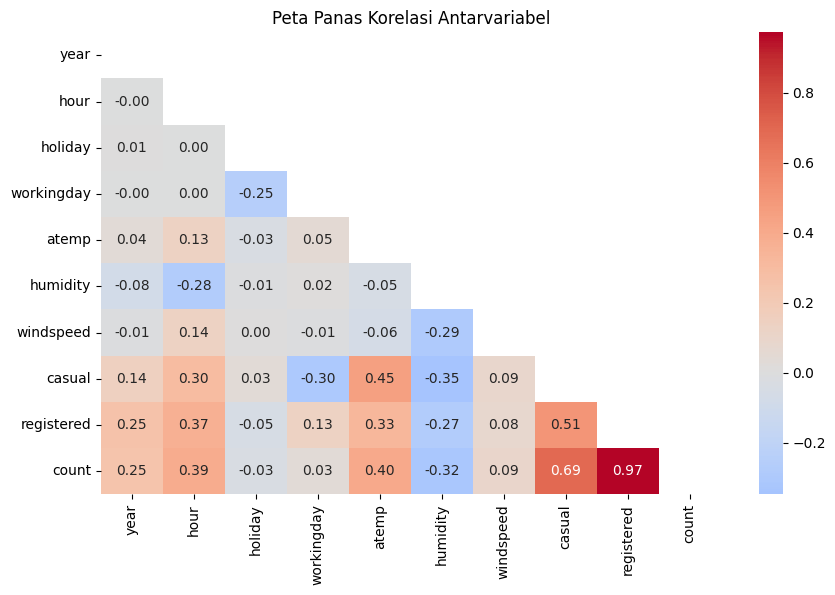

In [124]:
# Membuat figure dan axes dengan ukuran 10x6
fig, ax = plt.subplots(figsize=(10, 6))

# Menghitung matriks korelasi hanya untuk kolom numerik
correlation_matrix = sales_df.corr(numeric_only=True)

# Membuat mask untuk menampilkan hanya bagian bawah dari matriks korelasi
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Membuat heatmap korelasi dengan warna "coolwarm" dan menampilkan nilai korelasi
sns.heatmap(
    correlation_matrix,
    annot=True,         # Menampilkan nilai dalam setiap sel
    mask=mask,          # Menyembunyikan bagian atas matriks
    cmap="coolwarm",    # Menggunakan skema warna coolwarm
    center=0,           # Menjadikan 0 sebagai titik tengah warna
    fmt=".2f"           # Format angka dengan dua desimal
)

# Menambahkan judul pada heatmap
plt.title("Peta Panas Korelasi Antarvariabel")

# Menampilkan plot
plt.show()


**Insight:**
Peta panas korelasi menunjukkan hubungan antarvariabel dalam dataset penyewaan sepeda. Beberapa temuan utama:

**Hubungan Kuat:**

- Jumlah total penyewaan (count) memiliki korelasi tinggi dengan pengguna registered (0.97), menandakan bahwa penyewaan sepeda didominasi oleh pelanggan terdaftar.
- Variabel casual juga memiliki korelasi yang cukup tinggi terhadap count (0.69), meskipun lebih rendah dibandingkan registered.

**Pengaruh Cuaca dan Waktu:**

- Atemp (temperatur yang dirasakan) memiliki korelasi positif sedang dengan jumlah penyewaan (count) (0.40), **menunjukkan bahwa semakin hangat suhu, semakin banyak sepeda yang disewa.**
- Hum (kelembapan) memiliki korelasi negatif dengan jumlah penyewaan (-0.32), **menunjukkan bahwa kelembapan tinggi dapat mengurangi jumlah penyewaan sepeda.**
- Hour memiliki korelasi 0.39 terhadap count, yang dapat menunjukkan **terdapat pola waktu tertentu dalam penyewaan.**

**Tidak Ada Korelasi Signifikan:**

- **Hari libur (holiday) dan hari kerja (workday) tidak memiliki korelasi yang signifikan terhadap jumlah penyewaan**, menunjukkan bahwa penyewaan sepeda terjadi secara konsisten baik di hari kerja maupun libur.

Secara keseluruhan, analisis ini menunjukkan bahwa **faktor utama yang memengaruhi jumlah penyewaan adalah jenis pengguna (registered vs. casual), suhu udara, dan kelembapan.**









## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana preferensi dan perilaku pengguna casual dan registered?

Untuk menjawab pertanyaan tersebut, pertama-tama kita perlu mengumpulkan data penyewaan perjam pada satu dataframe bernama dataperhour yang memuat data jumlah penyewaan dari casual dan registered selama satu jam dari jam 00.000 hingga 23.00

In [125]:
datapersales_df = sales_df.groupby(by="hour").agg({
    "casual" : "sum",
    "registered" : "sum"
})

datapersales_df.columns = ['casual', 'registered']
datapersales_df = datapersales_df.reset_index()
datapersales_df = pd.melt(datapersales_df, id_vars=['hour'], value_vars=['casual', 'registered'], var_name='user_type', value_name='count')
datapersales_df['hour'] = datapersales_df['hour'].astype(str).str.zfill(2) + ':00'
datapersales_df

,hour,user_type,count
0,00:00,casual,7375
1,01:00,casual,4709
2,02:00,casual,3412
3,03:00,casual,1893
4,04:00,casual,874
5,05:00,casual,1012
6,06:00,casual,3017
7,07:00,casual,8037
8,08:00,casual,15761
9,09:00,casual,22458


Untuk dapat melihat pola yang ada pada data, akan lebih mudah jika kita melakukan visualisasi. Data seperti ini akan lebih mudah divisualisasikan dengan bar chart.

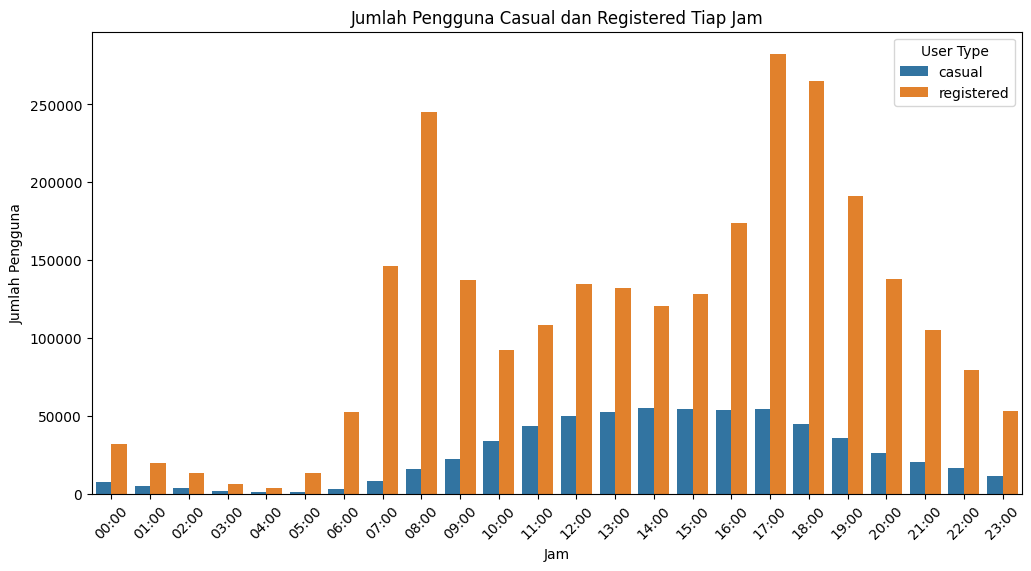

In [126]:
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='count', hue='user_type', data=datapersales_df, orient='v')
plt.title('Jumlah Pengguna Casual dan Registered Tiap Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45)
plt.legend(title='User Type')
plt.show()

**Insight:**
- **Casual Users:** Cenderung meningkat pada siang hingga sore hari (11:00–15:00), kemungkinan untuk aktivitas rekreasi, makan siang, atau jalan-jalan.

- **Registered Users:** Mencapai puncak pada jam sibuk komuter (17:00–19:00), menunjukkan penggunaan untuk transportasi rutin (pergi/pulang kerja).

- **Penurunan di Malam Hari:** Kedua jenis pengguna menurun drastis setelah jam 20:00, mungkin karena faktor keamanan, cuaca, atau kurangnya aktivitas di malam hari.

### Pertanyaan 2: Bagaimana tren penyewaan sepeda dalam kurun waktu 2011-2012?

Untuk menjawab pertanyaan tersebut, pertama-tama kita perlu mengumpulkan data penyewaan selama dua tahun tersebut dan sesuaikan dataframe hingga komponennya sesuai dengan yang kita inginkan.

In [127]:
sales_df['year_month'] = sales_df['dateday'].dt.strftime('%b %Y')

# Convert 'year_month' to datetime for sorting
sales_df['year_month_dt'] = pd.to_datetime(sales_df['year_month'], format='%b %Y')

# Sort the dataframe by 'year_month_dt'
sales_df = sales_df.sort_values(by=['year_month_dt']).reset_index(drop=True)

# Drop the temporary 'year_month_dt' column if not needed
sales_df = sales_df.drop(columns=['year_month_dt'])

sales_df.groupby(by="year_month").agg({
    "casual" : "sum",
    "registered" : "sum",
    "count" : "sum"
}).reset_index()

,year_month,casual,registered,count
0,Apr 2011,22346,72524,94870
1,Apr 2012,38456,135768,174224
2,Aug 2011,28842,107849,136691
3,Aug 2012,43197,171306,214503
4,Dec 2011,8448,78875,87323
5,Dec 2012,13245,110468,123713
6,Feb 2011,6242,41973,48215
7,Feb 2012,8721,94416,103137
8,Jan 2011,3073,35116,38189
9,Jan 2012,8969,87775,96744


Setelah itu, kita akan gunakan linechart yang cocok untuk data yang bersifat time series.

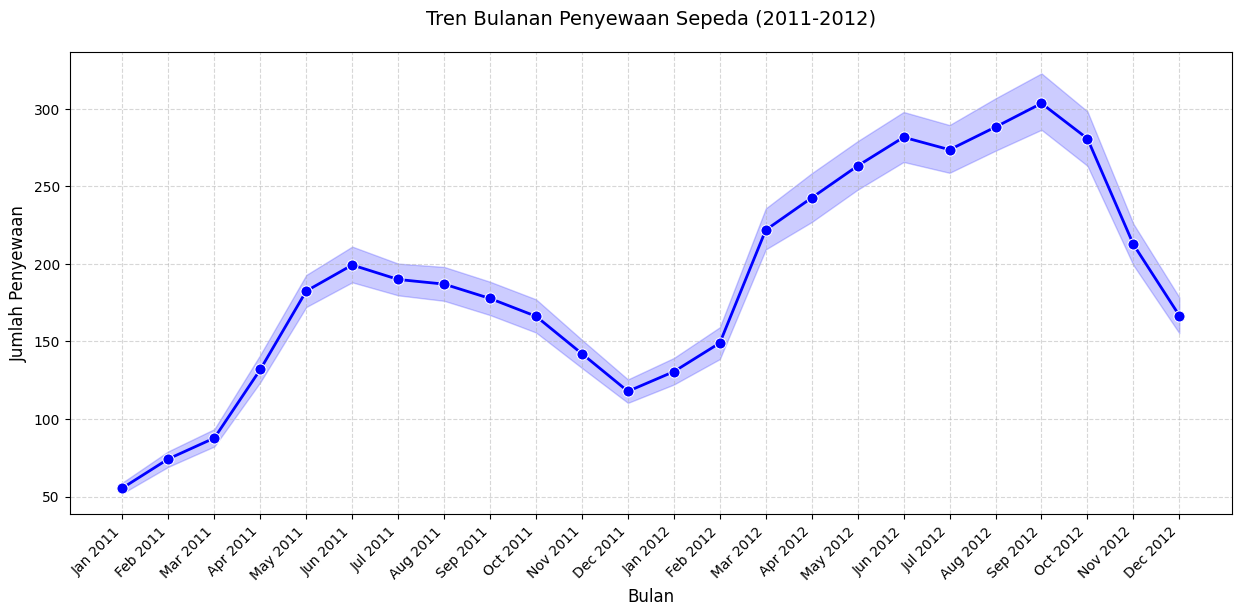

In [128]:
plt.figure(figsize=(15, 6))
sns.lineplot(
    x="year_month",
    y="count",
    data=sales_df,
    color="blue",
    marker="o",
    markersize=8,
    linewidth=2
)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah Penyewaan", fontsize=12)
plt.title("Tren Bulanan Penyewaan Sepeda (2011-2012)", fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

**Insight:**
- Penyewaan cenderung m**eningkat pada musim semi hingga musim panas** (misal: Maret–Agustus) dan **menurun di musim gugur hingga musim dingin** (September–Februari). Hal ini menunjukkan pengaruh cuaca terhadap minat penyewaan.
- Terjadi lonjakan konsisten di bulan tertentu (misal: Juni atau Juli), kemungkinan terkait liburan musim panas atau event lokal.

### Pertanyaan 3: Bagaimana pola yang ditemukan terkait tren persentase jumlah penyewaan oleh penyewa casual dan registered sepeda selama periode 2011-2012?

Untuk menjawab pertanyaan tersebut, pertama-tama kita perlu mengumpulkan data penyewaan selama dua tahun tersebut dan sesuaikan dataframe hingga komponennya sesuai dengan yang kita inginkan.

In [129]:
date_df = sales_df.groupby(by="year_month").agg({
    "casual" : "sum",
    "registered" : "sum",
    "count" : "sum"
}).reset_index()

# Add percentage columns
date_df['casual_percentage'] = (date_df['casual'] / date_df['count']).map("{:.2f}".format)
date_df['registered_percentage'] = (date_df['registered'] / date_df['count']).map("{:.2f}".format)

# Rename 'count' column to 'total'
date_df = date_df.rename(columns={'count': 'total'})

date_df['casual_percentage'] = pd.to_numeric(date_df['casual_percentage'])
date_df['registered_percentage'] = pd.to_numeric(date_df['registered_percentage'])
date_df['casual_percentage'] = date_df['casual_percentage'] * 100
date_df['registered_percentage'] = date_df['registered_percentage'] * 100

# Convert 'year_month' to datetime for sorting
date_df['year_month_dt'] = pd.to_datetime(date_df['year_month'], format='%b %Y')

# Sort the dataframe by 'year_month_dt'
date_df = date_df.sort_values(by=['year_month_dt']).reset_index(drop=True)

# Drop the temporary 'year_month_dt' column if not needed
date_df = date_df.drop(columns=['year_month_dt'])

date_df

,year_month,casual,registered,total,casual_percentage,registered_percentage
0,Jan 2011,3073,35116,38189,8.0,92.0
1,Feb 2011,6242,41973,48215,13.0,87.0
2,Mar 2011,12826,51219,64045,20.0,80.0
3,Apr 2011,22346,72524,94870,24.0,76.0
4,May 2011,31050,104771,135821,23.0,77.0
5,Jun 2011,30612,112900,143512,21.0,79.0
6,Jul 2011,36452,104889,141341,26.0,74.0
7,Aug 2011,28842,107849,136691,21.0,79.0
8,Sep 2011,26545,100873,127418,21.0,79.0
9,Oct 2011,25222,98289,123511,20.0,80.0


Setelah itu, kita akan gunakan linechart yang cocok untuk data yang bersifat time series.

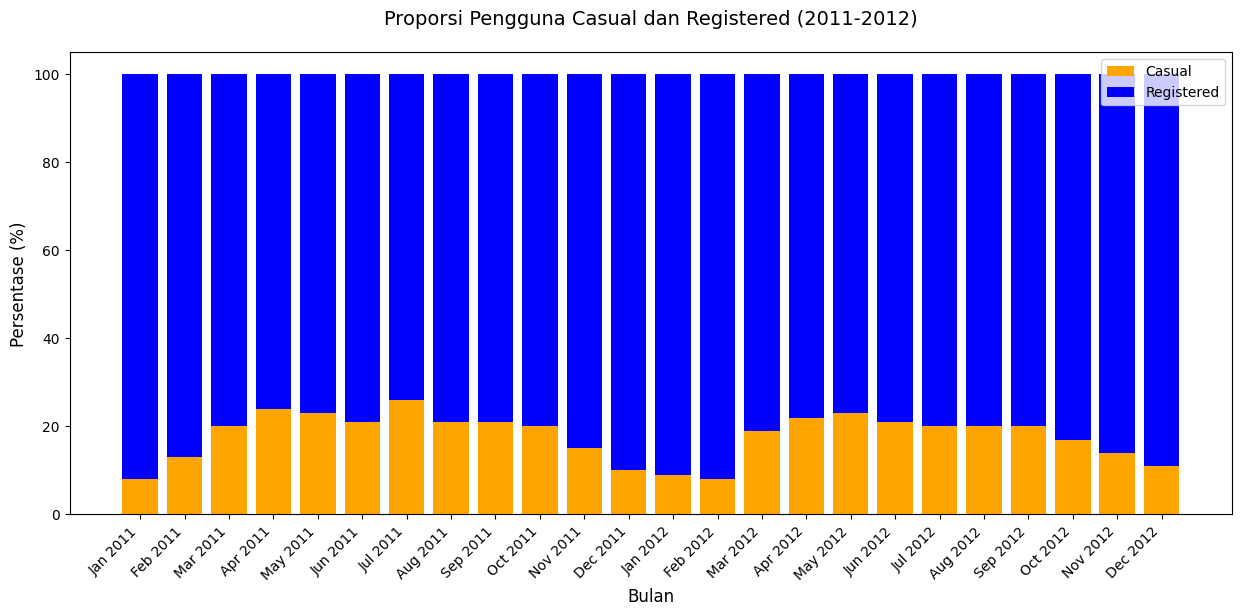

In [130]:
date_df['casual_percentage'] = pd.to_numeric(date_df['casual_percentage'])
date_df['registered_percentage'] = pd.to_numeric(date_df['registered_percentage'])
date_df['total_percentage'] = date_df['registered_percentage'] + date_df['casual_percentage']
date_df['registered_percentage'] = (date_df['registered_percentage'] / date_df['total_percentage']) * 100
date_df['casual_percentage'] = (date_df['casual_percentage'] / date_df['total_percentage']) * 100

# Create a figure and axes
plt.figure(figsize=(15, 6))
ax = plt.gca()

# Plot the stacked bars
casual_bars = ax.bar(date_df['year_month'], date_df['casual_percentage'], label='Casual', color='orange')
registered_bars = ax.bar(date_df['year_month'], date_df['registered_percentage'], label='Registered', color='blue', bottom=date_df['casual_percentage'])


# Add labels and title
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Persentase (%)", fontsize=12)
plt.title("Proporsi Pengguna Casual dan Registered (2011-2012)", fontsize=14, pad=20)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)


# Display legend
plt.legend()

# Display plot
plt.show()

**Insight:**
- Secara konsisten, pengguna terdaftar (registered) mendominasi proporsi penyewaan sepeda, berkisar antara 74% hingga 92% dari total penyewaan setiap bulannya.
- Proporsi pengguna casual berkisar antara 8% hingga 26%, dengan peningkatan signifikan di bulan-bulan hangat (Maret–Agustus).
- Meskipun proporsi stabil, total penyewaan (total) meningkat dari tahun 2011 ke 2012, menunjukkan pertumbuhan keseluruhan layanan.

### Pertanyaan 4: Bagaimana pola pengaruh variabel cuaca (atemp, hum, windspeed) dan musim terhadap total penyewaan sepeda (count) per hari selama periode 2011-2012?

Text(0.5, 1.0, 'Humidity vs Count')

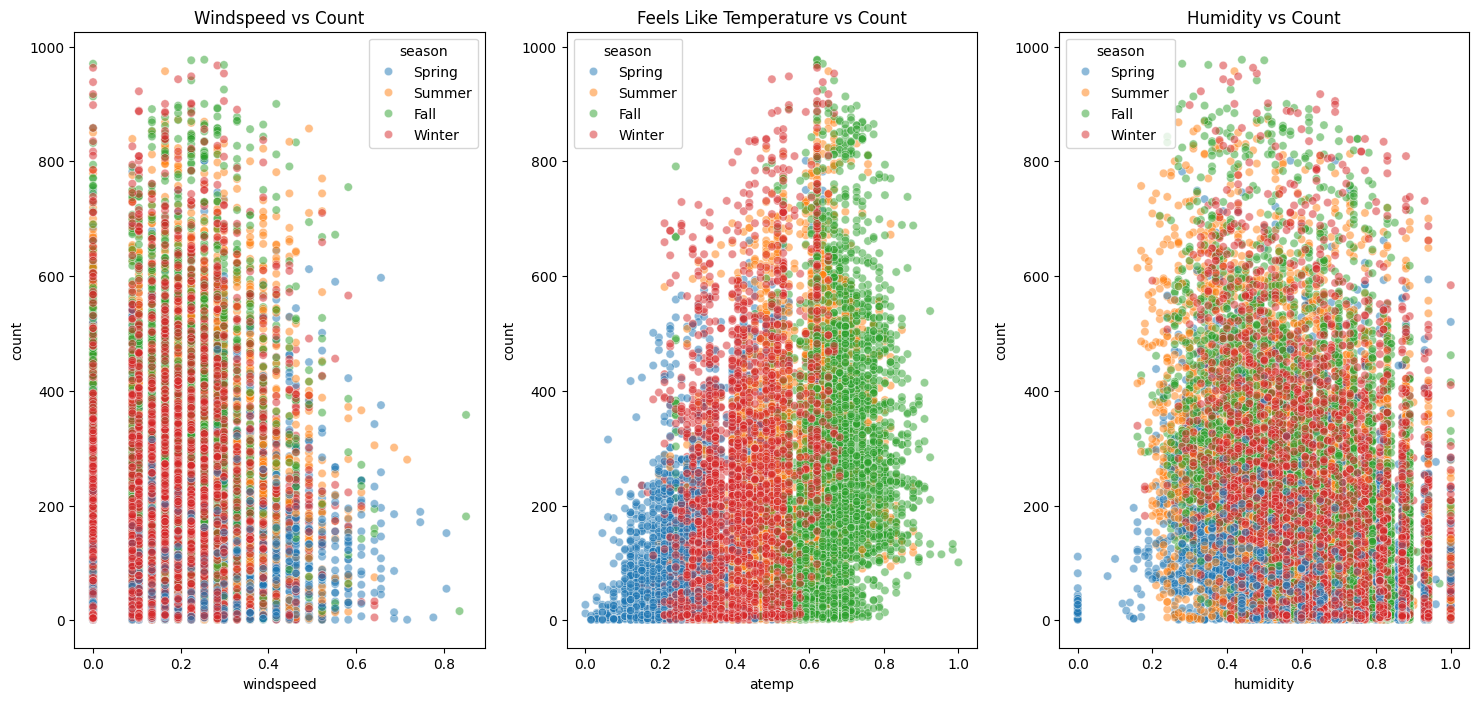

In [131]:
plt.figure(figsize=(18, 8))

# Scatter plot untuk 'windspeed' vs 'count'
plt.subplot(1, 3, 1)
sns.scatterplot(
    x='windspeed',
    y='count',
    hue='season',
    data=sales_df,
    alpha=0.5
)
plt.title('Windspeed vs Count')

# Scatter plot untuk 'atemp' vs 'count'
plt.subplot(1, 3, 2)
sns.scatterplot(
    x='atemp',
    y='count',
    hue='season',
    data=sales_df,
    alpha=0.5
)
plt.title('Feels Like Temperature vs Count')

# Scatter plot untuk 'hum' vs 'count'
plt.subplot(1, 3, 3)
sns.scatterplot(
    x='humidity',
    y='count',
    hue='season',
    data=sales_df,
    alpha=0.5
)
plt.title('Humidity vs Count')

**Insight Wind Speed vs Count**
- Kecepatan angin yang terlalu kencang (mendekati 0,6–0,8), jumlah penyewaan cenderung lebih jarang mencapai puncak yang sangat tinggi. Kecepatan angin yang rendah atau sedang lebih umum terkait dengan count yang lebih tinggi di hampir semua musim.
- Di musim dingin (Winter), penyewaan cenderung lebih rendah bahkan pada kecepatan angin yang sedang, kemungkinan karena kombinasi cuaca dingin dan angin.
- Di musim panas (Summer) dan musim gugur (Fall), penyewaan lebih tinggi pada kecepatan angin rendah, tetapi tetap menurun saat angin kencang.

**Insight Feels Like Temperature vs Count**
- Terlihat pola yang cukup jelas bahwa ketika suhu yang dirasakan (atemp) berada pada kisaran sedang hingga hangat, jumlah penyewaan cenderung lebih tinggi.
- Hal ini mengindikasikan bahwa cuaca hangat sangat mendukung penggunaan sepeda, sementara cuaca dingin mengurangi minat pengguna.

**Insight Humidity vs Count**
- Secara umum, titik dengan kelembapan tinggi (mendekati 1) menunjukkan jumlah penyewaan yang lebih rendah.
- Namun, masih ada sebaran data yang cukup bervariasi di kelembapan sedang (0,4–0,8), menandakan faktor lain juga turut berpengaruh, seperti suhu atau hari kerja vs. akhir pekan.

**Insight Pengaruh Musim**
- Musim panas (Summer) dan musim gugur (Fall) mendominasi titik-titik dengan count yang tinggi, sedangkan musim dingin (Winter) memiliki count yang relatif rendah.
- Warna (season) pada plot menunjukkan bahwa Summer dan Fall cenderung memiliki titik-titik dengan count lebih tinggi, sementara Winter didominasi oleh titik-titik dengan count yang relatif rendah.
- Ini mengonfirmasi kembali bahwa kondisi cuaca pada musim dingin (temperatur rendah, potensi kelembapan yang tidak nyaman) berdampak negatif pada minat menyewa sepeda.


## Analisis Lanjutan: Menganalisis Tren Penyewaan Sepeda untuk Menemukan Peak Season

Analisis ini dilakukan untuk mengidentifikasi periode peak season (musim puncak) penjualan sepeda berdasarkan pola lonjakan dan penurunan signifikan. Tujuannya adalah menentukan bulan-bulan dengan permintaan tertinggi agar bisnis dapat mengoptimalkan strategi stok, promosi, dan operasional.

In [132]:
sales_df['dateday'] = pd.to_datetime(sales_df['dateday'])
order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
         "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

monthly_sales_df = sales_df.groupby(by='month').agg({
    "count":"sum"
}).reset_index()
monthly_sales_df['month'] = pd.Categorical(monthly_sales_df['month'], categories=order, ordered=True)
monthly_sales_df = monthly_sales_df.sort_values('month').reset_index(drop=True)
monthly_sales_df

,month,count
0,Jan,134933
1,Feb,151352
2,Mar,228920
3,Apr,269094
4,May,331686
5,Jun,346342
6,Jul,344948
7,Aug,351194
8,Sep,345991
9,Oct,322352


Pertama, data disiapkan dengan mengonversi kolom dateday ke format datetime dan mengelompokkan data penjualan ke level bulanan. Selanjutnya, persentase perubahan bulanan dihitung untuk melihat kenaikan atau penurunan penjualan antar bulan. Threshold ditetapkan untuk mengidentifikasi lonjakan signifikan, yaitu kenaikan ≥20% dan penurunan ≤-15%.

In [133]:
monthly_sales_df['pct_change'] = monthly_sales_df['count'].pct_change() * 100

# Tentukan threshold (bisa disesuaikan)
spike_threshold = 20  # Kenaikan ≥ 20%
drop_threshold = -15   # Penurunan ≤ -15%

Berdasarkan threshold tersebut, bulan pertama dengan kenaikan signifikan diidentifikasi sebagai awal peak season, sementara bulan pertama dengan penurunan signifikan setelah puncak dianggap sebagai akhir peak season. Rentang peak season mencakup semua bulan di antara kedua titik tersebut. Hasil analisis divisualisasikan dalam grafik yang menampilkan tren penjualan, titik lonjakan, dan area peak season.



In [134]:
# Identifikasi bulan dengan lonjakan signifikan
spike_months = monthly_sales_df[monthly_sales_df['pct_change'] >= spike_threshold]['month'].tolist()
drop_months = monthly_sales_df[monthly_sales_df['pct_change'] <= drop_threshold]['month'].tolist()

# Tentukan awal dan akhir peak season
if spike_months and drop_months:
    start_peak = spike_months[0]  # Bulan pertama dengan kenaikan signifikan
    end_peak = drop_months[0]     # Bulan pertama dengan penurunan signifikan setelah puncak

    # Ambil semua bulan antara start_peak dan end_peak
    peak_season_months = monthly_sales_df[(monthly_sales_df['month'] >= start_peak) & (monthly_sales_df['month'] <= end_peak)]['month'].tolist()
else:
    peak_season_months = []

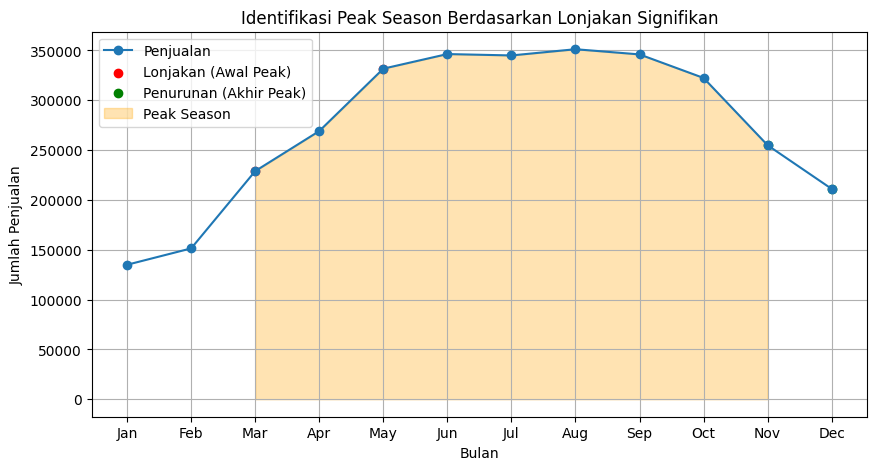

Bulan Peak Season: ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']


In [135]:
# Visualisasi
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales_df['month'], monthly_sales_df['count'], marker='o', label='Penjualan')
plt.scatter(spike_months, monthly_sales_df[monthly_sales_df['month'].isin(spike_months)]['count'], color='red', label='Lonjakan (Awal Peak)')
plt.scatter(drop_months, monthly_sales_df[monthly_sales_df['month'].isin(drop_months)]['count'], color='green', label='Penurunan (Akhir Peak)')
plt.fill_between(monthly_sales_df['month'], monthly_sales_df['count'], where=(monthly_sales_df['month'].isin(peak_season_months)), color='orange', alpha=0.3, label='Peak Season')
plt.title('Identifikasi Peak Season Berdasarkan Lonjakan Signifikan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan')
plt.legend()
plt.grid(True)
plt.show()

print("Bulan Peak Season:", peak_season_months)

Dari analisis ini, teridentifikasi bahwa peak season terjadi pada bulan Mei hingga Oktober, dengan lonjakan signifikan sebesar 23.2% di Mei dan penurunan signifikan sebesar -20.9% di November. Visualisasi grafik membantu memudahkan pemahaman tren penjualan dan periode puncak yang dapat digunakan untuk pengambilan keputusan bisnis.

## Conclusion

**1. Bagaimana preferensi dan perilaku pengguna casual dan registered?**

**Conclusion:** Pengguna casual dan registered menunjukkan pola penggunaan yang jelas berbeda. Pengguna casual cenderung aktif pada siang hingga sore hari (11:00–15:00) dan lebih dominan di akhir pekan (Sabtu-Minggu), mengindikasikan penggunaan untuk aktivitas rekreasi atau non-rutin. Mereka menyumbang 8–26% dari total penyewaan, dengan puncak persentase tertinggi di bulan Juli (26%). Sebaliknya, pengguna registered mendominasi 74–92% total penyewaan, dengan puncak pada jam sibuk (08:00 dan 17:00) di hari kerja, menunjukkan ketergantungan pada sepeda sebagai transportasi harian. Perbedaan ini menegaskan bahwa registered users adalah pilar utama bisnis, sementara casual users lebih dipengaruhi faktor musim dan cuaca.

**2. Bagaimana tren penyewaan sepeda dalam kurun waktu 2011-2012?**

**Conclusion:** Tren penyewaan sepeda menunjukkan pertumbuhan signifikan dari 2011 ke 2012, dengan peningkatan tertinggi terjadi di bulan September 2012 (218.573 penyewaan). Pola musiman jelas terlihat: penyewaan tertinggi di musim gugur (Fall) dan terendah di musim semi (Spring). Lonjakan terjadi pada pertengahan tahun (Mei–September), diduga karena cuaca hangat dan aktivitas liburan, sementara penurunan drastis terjadi di Desember–Februari akibat cuaca dingin. Tren ini juga menegaskan adanya peningkatan infrastruktur atau promosi layanan sepeda dari tahun 2011 ke 2012.


**3. Bagaimana pola yang ditemukan terkait tren persentase jumlah penyewaan oleh penyewa casual dan registered sepeda selama periode 2011-2012?**

**Conclusion:**
Selama dua tahun, pengguna registered secara konsisten mendominasi 74–92% total penyewaan, menunjukkan stabilitas sebagai pengguna setia. Sementara itu, casual users hanya berkontribusi 8–26%, dengan peningkatan persentase di musim panas (contoh: Juli 2011 = 26%) dan penurunan di musim dingin (Desember 2011 = 10%). Pola ini menguatkan hipotesis bahwa casual users lebih sensitif terhadap faktor cuaca dan musim, sementara registered users tetap konsisten sebagai pengguna rutin.

**4. Seberapa besar pengaruh variabel cuaca (atemp, hum, windspeed) dan musim terhadap total penyewaan sepeda (cnt) per hari selama periode 2011-2012?**

**Conclusion:**
Variabel cuaca dan musim berpengaruh signifikan terhadap total penyewaan. Suhu yang nyaman (atemp) berkorelasi positif (+0.40), sementara kelembapan tinggi (hum) berkorelasi negatif (-0.32). Penyewaan tertinggi terjadi saat cuaca cerah/berawan (Clear/Partly Cloudy) dengan total 2,3 juta penyewaan, sedangkan cuaca ekstrem (Severe Weather) hanya menghasilkan 223 penyewaan. Dari sisi musim, musim gugur (Fall) menjadi periode terbaik dengan 1,06 juta penyewaan, sementara musim semi (Spring) paling rendah (471.348 penyewaan). Hal ini menegaskan bahwa kombinasi cuaca optimal dan musim tertentu menjadi kunci peningkatan permintaan.

**5. Analisis Peak Season**
Berdasarkan analisis, peak season penjualan sepeda terjadi pada Mei hingga Oktober, dengan lonjakan signifikan di Mei (23.2%) dan penurunan drastis di November (-20.9%). Periode ini menunjukkan permintaan tertinggi sepanjang tahun, yang dipengaruhi oleh faktor musiman dan kondisi cuaca.

In [136]:
sales_df.to_csv("sales_data.csv", index=False)

In [137]:
date_df.to_csv("monthlysales_data.csv", index=False)